# **Dataset Information**

This is Mohammed COLAB

This dataset was created by picklesueat and contains more than 3900 job listing for data scientist positions, with features such as:
Salary Estimate
Location
Company Rating
Job Description
and more.
Reference: https://www.kaggle.com/andrewmvd/data-scientist-jobs


# Set Up and Load Data

In [1]:
# Importing libraries for analysis in alphabetical order
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# show matplotlib charts in cells
%matplotlib inline


# Set display options to not include scientific notation 
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#Upload data
file_path ="DataScientist.csv"
data_s = pd.read_csv(file_path)

In [4]:
data_s.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.50,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.50,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.00,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.40,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.40,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


## The dataset require a lot of cleanning and processing in order start analysis. 

Initial Review on the data:
1. it has duplicate indexes
2. Job Title has many duplicate name with strings attached
3. Salary needs cleaning and removing strings and converting to numbers
4. Company Name: has strings attached maybe from HTML.
5. a lot of meaningles -1 in columns

# Data Exploration Analysis

Dataset Column and Row


In [5]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

# Cleaning and Preparing Process

In [6]:
#Remove the columns
data_s.drop(['Unnamed: 0', 'index', 'Founded','Revenue','Competitors', 'Easy Apply'], axis=1, inplace=True)


In [7]:
data_s.rename(columns={"Job Description": "Description"}, inplace=True)

In [8]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3909 non-null   object 
 1   Salary Estimate    3909 non-null   object 
 2   Description        3909 non-null   object 
 3   Rating             3909 non-null   float64
 4   Company Name       3909 non-null   object 
 5   Location           3909 non-null   object 
 6   Headquarters       3909 non-null   object 
 7   Size               3909 non-null   object 
 8   Type of ownership  3909 non-null   object 
 9   Industry           3909 non-null   object 
 10  Sector             3909 non-null   object 
dtypes: float64(1), object(10)
memory usage: 336.1+ KB


In [9]:
#Replacing -1 with nan
data_s["Size"] = data_s["Size"].replace("Unknown", -1)
data_s.replace(['-1'], [np.nan], inplace=True)
data_s.replace(['-1.0'], [np.nan], inplace=True)
data_s.replace([-1], [np.nan], inplace=True)

data_s.isnull().sum()

Job Title              0
Salary Estimate        0
Description            0
Rating               409
Company Name           0
Location               0
Headquarters         240
Size                 306
Type of ownership    229
Industry             546
Sector               546
dtype: int64

In [10]:
#separate columns of Salary Estimate as minimum and maximum salary

df_salary = data_s['Salary Estimate'].str.split("-",expand=True,)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K',' ')


maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', ' ')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)

In [11]:
data_s['Minimum Salary'] = minimum_salary
data_s['Maximum Salary'] = maximum_salary

data_s.drop('Salary Estimate',axis = 1,inplace = True)

In [12]:
#Cleaned company name
data_s['Company Name'] = data_s['Company Name'].str.replace('\n.*', ' ')

In [13]:
maximum_salary.value_counts()

144    120
175     93
151     92
122     90
140     90
      ... 
185      7
53       7
173      6
26       3
74       1
Name: 1, Length: 97, dtype: int64

In [14]:
# cleaning  position name in job title
data_s['Job Title'] = data_s['Job Title'].str.replace('Sr.', 'Senior')
data_s['Job Title'] = data_s['Job Title'].str.replace('SeniorData Analyst', 'Senior Data Analyst')
data_s['Job Title'] = data_s['Job Title'].str.replace('SeniorData Scientist', 'Senior Data Scientist')
data_s['Job Title'] = data_s['Job Title'].str.replace('12 month Roster', ' ')
data_s['Job Title'] = data_s['Job Title'].str.replace('Direct Hire', ' ')


data_s['Job Title'].value_counts().head(50)

Data Scientist                                                   274
Data Engineer                                                    260
Data Analyst                                                     246
Senior Data Scientist                                            123
Senior Data Analyst                                               64
Senior Data Engineer                                              50
Machine Learning Engineer                                         47
Big Data Engineer                                                 41
Business Intelligence Analyst                                     39
Lead Data Scientist                                               23
Research Scientist                                                22
Data Modeler                                                      17
Junior Data Analyst                                               15
Principal Data Scientist                                          15
Statistician (Data Scientist) * * 

In [15]:
# categorization for company sizes
small =  ["1 to 50 employees", "51 to 200 employees"]
medium = ["201 to 500 employees", '501 to 1000 employees']
large = ['10000+ employees', '1001 to 5000 employees', '5001 to 10000 employees']


#small
data_s["Size"] = data_s["Size"].replace(small, "Small") 
#Medium
data_s["Size"] = data_s["Size"].replace(medium, "Medium")
#Large
data_s["Size"] = data_s["Size"].replace(large, "Large")



In [16]:
#Cleaning the Size column
data_s["Size"].value_counts()

Large     1765
Small     1113
Medium     725
Name: Size, dtype: int64

In [17]:
data_s

,Job Title,Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.50,Hopper,"New York, NY","Montreal, Canada",Medium,Company - Private,Travel Agencies,Travel & Tourism,111,181
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.50,Noom US,"New York, NY","New York, NY",Large,Company - Private,"Health, Beauty, & Fitness",Consumer Services,111,181
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,nan,Decode_M,"New York, NY","New York, NY",Small,Unknown,NaN,NaN,111,181
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.40,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",Medium,Company - Private,Internet,Information Technology,111,181
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.40,United Entertainment Group,"New York, NY","New York, NY",Small,Company - Private,Advertising & Marketing,Business Services,111,181
...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.40,Tachyon Technologies,"Dublin, OH","Irving, TX",Medium,Company - Private,IT Services,Information Technology,55,112
3905,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.00,"Staffigo Technical Services, LLC","Columbus, OH","Woodridge, IL",Small,Company - Private,IT Services,Information Technology,55,112
3906,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.80,"PDS Tech, Inc.","Dublin, OH","Irving, TX",Large,Company - Private,Staffing & Outsourcing,Business Services,55,112
3907,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.00,Data Resource Technologies,"Dublin, OH","Omaha, NE",Small,Company - Private,Accounting,Accounting & Legal,55,112


## **Completed Visualization**

In [18]:
# groub by title and number of posts and get only the top 10
by_title = data_s.groupby(by=['Job Title'], as_index=False).agg({'Company Name' :'count'}).sort_values(by=['Company Name'], ascending=False).head(10)

# rename company name to Number of posts
by_title.rename(columns={"Company Name": "Number of Posts"}, inplace=True)
by_title

,Job Title,Number of Posts
656,Data Scientist,274
498,Data Engineer,260
376,Data Analyst,246
1736,Senior Data Scientist,123
1688,Senior Data Analyst,64
1708,Senior Data Engineer,50
1148,Machine Learning Engineer,47
166,Big Data Engineer,41
227,Business Intelligence Analyst,39
1116,Lead Data Scientist,23


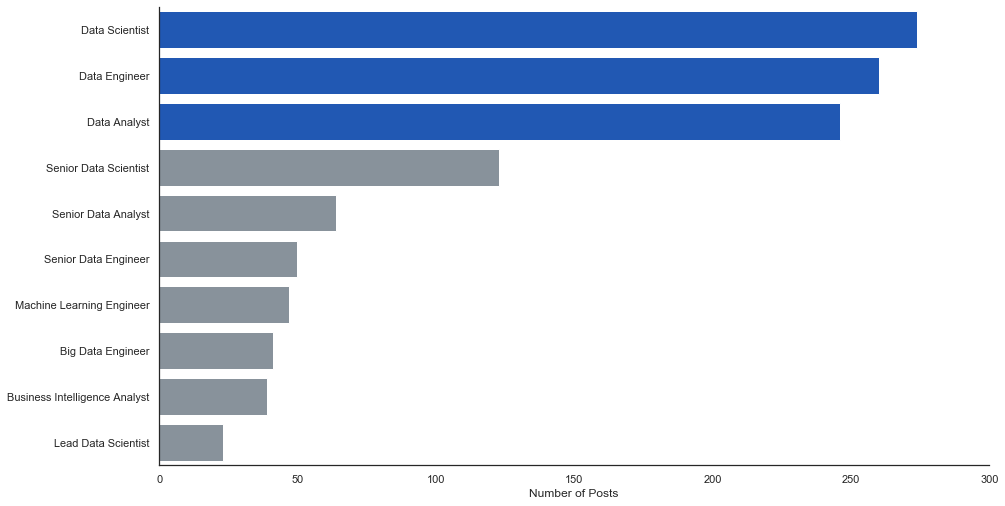

In [19]:
# choosing colors
top_color = "#0952CB"
none_top_color = "#85929E"
# set the background to white
sns.set_theme(style="white")
# create chart and adding palette colors on top 3
chart = sns.catplot(
    data=by_title, 
    x="Number of Posts", 
    y='Job Title', 
    kind="bar",
    height= 7,
    aspect=2,
    legend=False,
    palette={
        "Data Scientist": top_color,
        "Data Engineer" : top_color,
        "Data Analyst":   top_color,
       "Senior Data Scientist": none_top_color,
        "Senior Data Analyst"	: none_top_color,
        "Senior Data Engineer"	: none_top_color,
        "Machine Learning Engineer"	: none_top_color,
        "Big Data Engineer"	: none_top_color,
        "Business Intelligence Analyst"	: none_top_color,
        "Lead Data Scientist": none_top_color,
        }  
    )
chart.set(ylabel=None, xlim=(0,300))


In [20]:
chart.savefig('Top 10 Demand Postion')

In [21]:
# group by the size of the companies to get small and medium and large

company_size = data_s.groupby(by="Size", as_index=False)['Company Name'].count()

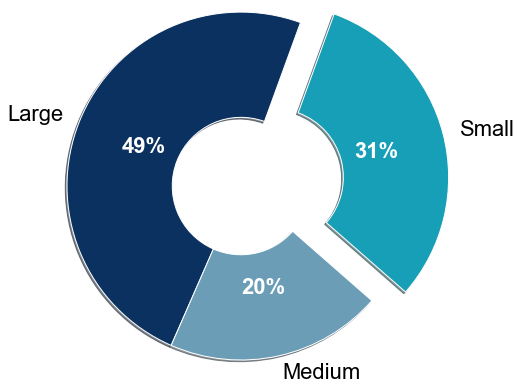

In [22]:
# create variables for data and labels and colors
pie_data = company_size.loc[:,'Company Name']
pie_labels = company_size.loc[:,'Size']
pie_color=['#0b3160','#6b9db6', '#169fb7'] 



# Make figure and axes
fig, axes  = plt.subplots(1, 1)


# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axes.pie(pie_data, 
                                     labels=pie_labels,
                                     colors=pie_color,
                                     autopct='%.0f%%',
                                     textprops={'size': 22, 'color': 'black'},
                                     shadow=True, 
                                     radius=2,
                                     startangle=70, # change the angle to make small on the right side
                                     wedgeprops=dict(width=1.21), # create donut chart
                                     explode=(0,0,0.4) # make the small standout
                                     
                                     )


plt.setp(autotexts, size=22, weight="bold", color="white")
plt.show()

fig.savefig("size")

In [23]:
company_size

,Size,Company Name
0,Large,1765
1,Medium,725
2,Small,1113


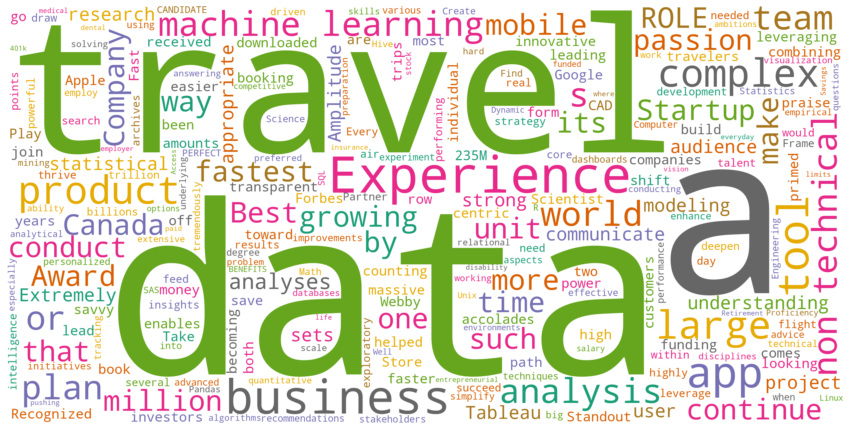

In [24]:
#importing wordcloud lib

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create a list of word and navigate what colomn
text= data_s.Description[0]



# 
wordcloud = WordCloud(
    background_color="white",  
    max_words=2000, # set it to 2000 words
    colormap='Dark2', # choosing color set
    height=1500, 
    width=3000,

# stoping some words that do not have meanining
    stopwords=['Length','nTachyon','nData','dtype','re','mi','Us','Noom','and', 'At','Name','seeks','com','Sapphire',"nAt",'ABOUT',
               "HOPPER", 'WWW','Decode_M','Description', 'Decode', 'nDescription', 'nhttps', 'we', 'on', 'is', 'DescriptionThe','UCB','nInterpret','use','The','resul', 'mission','Job'
               'inte', 'scientifically', 'will', 'lives','Help','proven', "patients '", "patients'",'With', 'to', 'of', 'in','for', 'our', 'as', 'over', 'has', 'from', 'you', 'other', 'THIS' ]
               
               ).generate(str(text))


                       
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [25]:
wordcloud.to_file("WordCloudHD.png")